In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [2]:
chunks = []

for chunk in pd.read_csv("analysis/not_uploaded/SSMTIA_test_scores.csv", sep=";", chunksize=100000):
    chunk["scores"] = chunk["scores"].apply(eval)

    chunk["styles_score"] = chunk["scores"].apply(lambda row: row["styles_score"][0]).astype("float16")
    chunk["technical_score"] = chunk["scores"].apply(lambda row: row["technical_score"][0]).astype("float16")
    chunk["composition_score"] = chunk["scores"].apply(lambda row: row["composition_score"][0]).astype("float16")

    chunk["styles_change_strength"] = chunk["scores"].apply(lambda row: row["styles_change_strength"])
    chunk["technical_change_strength"] = chunk["scores"].apply(lambda row: row["technical_change_strength"])
    chunk["composition_change_strength"] = chunk["scores"].apply(lambda row: row["composition_change_strength"])

    chunk = chunk.drop(columns=["scores"])
    chunks.append(chunk)
df = pd.concat(chunks)
del chunks
df

,img,parameter,change,styles_score,technical_score,composition_score,styles_change_strength,technical_change_strength,composition_change_strength
0,pexels-photo-2601199.jpeg,original,0.0,5.364418e-07,0.924316,0.999023,"[0.0023040771484375, 0.0172119140625, -0.00363...","[0.0083465576171875, 0.0108184814453125, 0.006...","[-0.036529541015625, 0.0011644363403320312, 0...."
1,pexels-photo-2281715.jpeg,original,0.0,0.000000e+00,0.784668,1.000000,"[0.05230712890625, -0.00574493408203125, -0.00...","[0.001674652099609375, 0.0265045166015625, 1.6...","[-0.042266845703125, 0.01160430908203125, 0.02..."
2,pexels-photo-1444107.jpeg,original,0.0,2.941895e-01,0.851562,0.669922,"[0.0037078857421875, -0.016571044921875, -0.00...","[0.03594970703125, 0.043212890625, 0.047882080...","[0.00553131103515625, 0.0016412734985351562, -..."
3,pexels-photo-3326725.jpeg,original,0.0,9.746094e-01,0.955566,0.789551,"[0.0094146728515625, 0.027679443359375, 0.0316...","[0.10614013671875, 0.040679931640625, 0.087097...","[-0.002719879150390625, -0.006023406982421875,..."
4,pexels-photo-2347378.jpeg,original,0.0,8.930664e-01,0.937988,0.844238,"[0.07366943359375, -0.0005645751953125, 0.0528...","[0.27587890625, 0.01348114013671875, 0.0403137...","[-0.001796722412109375, 0.006595611572265625, ..."
...,...,...,...,...,...,...,...,...,...
2744995,pexels-photo-1228628.jpeg,ratio,5.0,0.000000e+00,0.694824,1.000000,"[0.10992431640625, 0.00089263916015625, 0.0008...","[0.00026535987854003906, 0.0177764892578125, 3...","[-0.04443359375, 0.019805908203125, -0.0243530..."
2744996,pexels-photo-2300895.jpeg,ratio,5.0,3.508301e-01,0.648926,0.474121,"[-0.039031982421875, 0.0165252685546875, 0.010...","[0.0794677734375, 0.10284423828125, 0.10266113...","[0.006465911865234375, -0.0007734298706054688,..."
2744997,pexels-photo-2704927.jpeg,ratio,5.0,5.253906e-01,0.778320,0.865723,"[0.003662109375, -0.00113677978515625, 0.03182...","[0.059539794921875, 0.053985595703125, 0.07543...","[-0.0220489501953125, 0.0016603469848632812, -..."
2744998,pexels-photo-1033922.jpeg,ratio,5.0,2.824707e-01,0.643066,0.242065,"[-0.0165863037109375, 0.034698486328125, 0.005...","[0.10284423828125, 0.062225341796875, 0.144653...","[-0.0081787109375, 0.00034046173095703125, -0...."


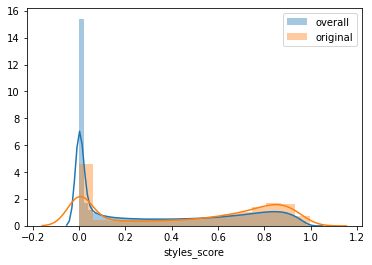

In [3]:
sns.distplot(df["styles_score"], label="overall")
sns.distplot(df[df["parameter"] == "original"]["styles_score"], label="original")
plt.legend()

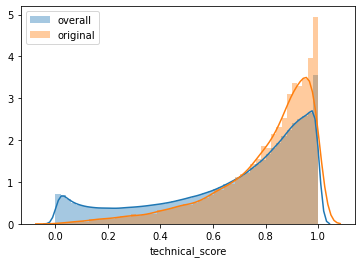

In [4]:
sns.distplot(df["technical_score"], label="overall")
sns.distplot(df[df["parameter"] == "original"]["technical_score"], label="original")
plt.legend()

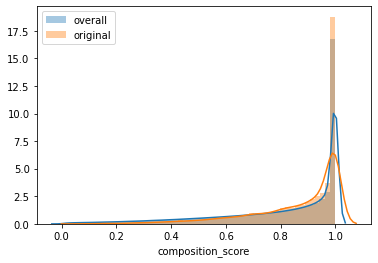

In [5]:
sns.distplot(df["composition_score"], label="overall")
sns.distplot(df[df["parameter"] == "original"]["composition_score"], label="original")
plt.legend()

In [6]:
def histogram_distortion(distortion:str, score:str):
    sns.distplot(df[df["parameter"] == "original"][score], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))][score], label=f"{parameter}: {change}")
    plt.legend()

In [7]:
def violin_distortion(distortion:str, score:str): # FIXME defaults for shadows, hightlights...
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    sns.violinplot(data=plot_frame, x="change", y=score, color="steelblue")

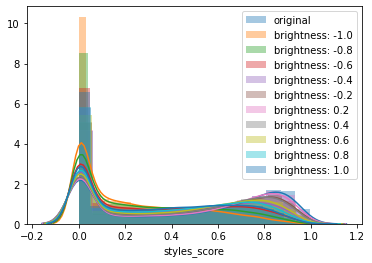

In [17]:
histogram_distortion("brightness", "styles_score")

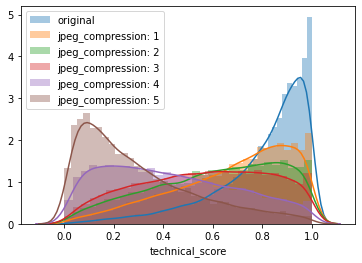

In [9]:
histogram_distortion("jpeg_compression", "technical_score")

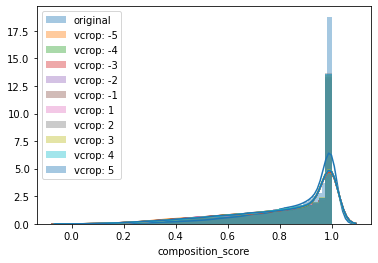

In [10]:
histogram_distortion("vcrop", "composition_score")

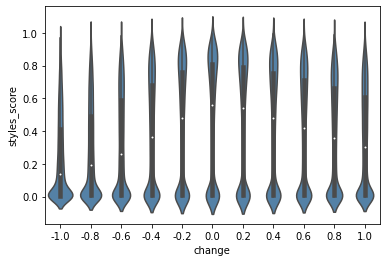

In [11]:
violin_distortion("brightness", "styles_score")

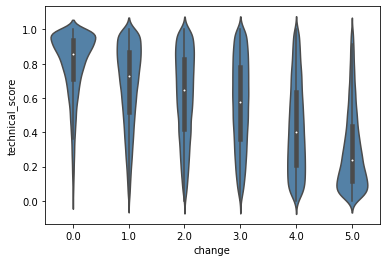

In [12]:
violin_distortion("jpeg_compression", "technical_score")

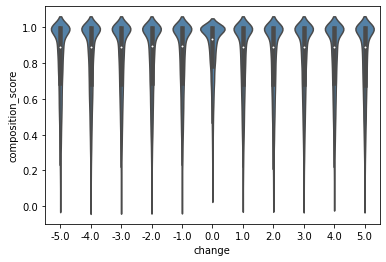

In [16]:
violin_distortion("hcrop", "composition_score")

In [67]:
def violin_changes_original(distortion:str):
    original_frame = df[df["parameter"] == "original"]
    results = []
    df_index = list(original_frame.columns).index(f"{distortion}_change_strength")
    for index, row in original_frame.iterrows():
        for i, k in enumerate(mapping[distortion].keys()):
            results.append({"distortion":distortion, "change_predict": k, "change_strength":row[df_index][i]})
    results = (pd.DataFrame([val], columns=val.keys()) for val in results)
    sns.violinplot(data=pd.concat(results, ignore_index=True), x="change_predict", y="change_strength", color="steelblue")

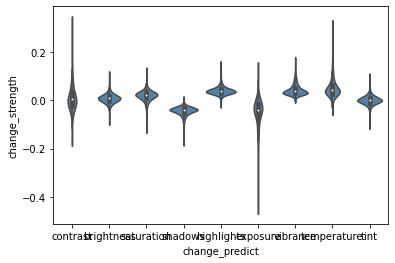

In [68]:
violin_changes_original("styles")

In [27]:
def histogram_changes(distortion:str, change:str):
    correct_index = list(mapping[distortion].keys()).index(change)
    df[(df["img"] == f) & ((df["parameter"] == distortion) | (df["parameter"] == "original"))][["change", "score"]]

In [14]:
def calculate_spearman(distortion:str, img_names=df["img"].unique()): # FIXME defaults for shadows, highlights, ...
    corr_l = []
    p_l = []
    for f in img_names:
        corr_df = df[(df["img"] == f) & ((df["parameter"] == distortion) | (df["parameter"] == "original"))][["change", "score"]]
        c, p = stats.spearmanr(corr_df["score"], corr_df["change"])
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l)/len(corr_l), sum(p_l)/len(p_l)

In [15]:
calculate_spearman("jpeg_compression")

KeyError: "['score'] not in index"